# Project: Investigate TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>

</ul>

<a id='intro'></a>
# Introduction 
the Internet Movie Database, has been a popular source for data analysis and visualizations over the years. The combination of user ratings for movies and detailed movie metadata have always been fun to play with.in this project we are, we are going to try to get insights and draw conclusion from the dataset to better understand the movies industry.


# Questions:

- how is the the average movie budget increased over the year
- Lead Actors that generated most revenue  
- Director who produced highly rated movies overall
- what was the most produced movie genres for the last three years

In [1]:
#importing relevant packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dateframe
df_imdb=pd.read_csv('tmdb-movies.csv')
df_imdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Exploring the data

In [3]:
#exploring the data
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#this function check the the type of the first item in each column

def type_check(Dataframe):
    for i in list(range(Dataframe.columns.shape[0])):
    
       print(Dataframe.columns[i],type(Dataframe[Dataframe.columns[i]][0]))
type_check(df_imdb)

id <class 'numpy.int64'>
imdb_id <class 'str'>
popularity <class 'numpy.float64'>
budget <class 'numpy.int64'>
revenue <class 'numpy.int64'>
original_title <class 'str'>
cast <class 'str'>
homepage <class 'str'>
director <class 'str'>
tagline <class 'str'>
keywords <class 'str'>
overview <class 'str'>
runtime <class 'numpy.int64'>
genres <class 'str'>
production_companies <class 'str'>
release_date <class 'str'>
vote_count <class 'numpy.int64'>
vote_average <class 'numpy.float64'>
release_year <class 'numpy.int64'>
budget_adj <class 'numpy.float64'>
revenue_adj <class 'numpy.float64'>


In [5]:
#checking for null values
df_imdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#descriptif stats for the dataframe
df_imdb.describe(include='all')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://phantasm.com,Woody Allen,Based on a true story.,...,No overview found.,NaN,Drama,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07


# remarks 

### the following columns has high amount of null values and/or no significance to the analysis, therefor they will be dropped 
- imdb_id
- homepage
- tagline
- keywords
- production company 

### incrorrect datatype :
- release_date

### a brief descriptif statistics (observring the quartiles in the numerical data) reveals the representation of null values by 0s 
- revenue_adj
- revenue
- budget_adj
- budget
- runtime
### presence of duplicated rows 


<a id='wrangling'></a>
# Data Wrangling


In [7]:
#correcting data type, from str to timestamp
df_imdb['release_date'] = pd.to_datetime(df_imdb.release_date)

In [8]:
#dropping insgnificant/troublesome columns
df_imdb=df_imdb.drop(['imdb_id','homepage','tagline','keywords','production_companies'],axis=1)

In [9]:
# replacing 0s with na values 
df_imdb['revenue_adj'].replace(0, np.NAN, inplace=True)
df_imdb['revenue'].replace(0, np.NAN, inplace=True)
df_imdb['budget_adj'].replace(0, np.NAN, inplace=True)
df_imdb['budget'].replace(0, np.NAN, inplace=True)
df_imdb['runtime'].replace(0, np.NAN, inplace=True)
#dropping na values
df_imdb=df_imdb.dropna(axis=0)

In [10]:
# exploring data for the presence of duplicates 
df_imdb.duplicated(subset=['director','release_year']).sum()
# dropping the duplicated rows
df_imdb.drop_duplicates(['director','release_date'],inplace=True)

<a id='eda'></a>

# Exploratory Data Analysis

## budget evolution over the years

In [11]:
#converting the scientific notation of numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
#calculating the mean budget for every year 
budget_yearly_average =df_imdb.groupby('release_year')['budget'].mean()

Text(0.5, 1.0, 'Budget yearly evolution')

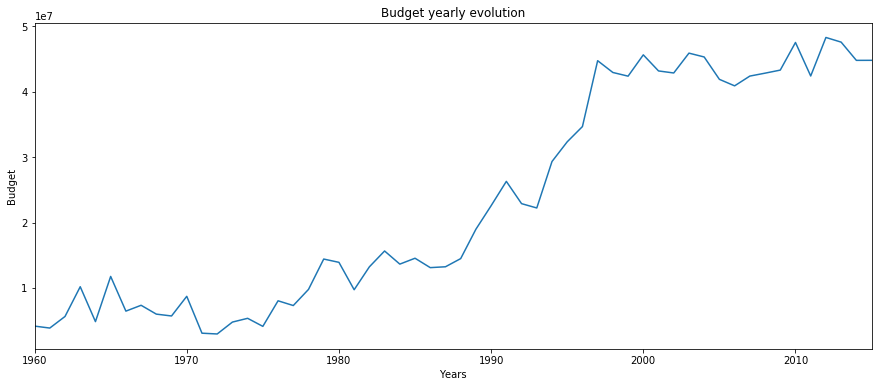

In [13]:
ax1=budget_yearly_average.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Budget')
plt.title('Budget yearly evolution')

## Actors with high profitable movies 

In [14]:
#splitting the columns with multiple entries into columns containing one value
cast = (df_imdb['cast'].str.split('|', expand=True).rename(columns=lambda x: f"actor {x+1}"))
director = (df_imdb['director'].str.split('|', expand=True).rename(columns=lambda x: f"director {x+1}"))
genres = (df_imdb['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))

In [15]:
#joining the newly created dataframe with the original one 
df_imdb=df_imdb.join([cast,director,genres])

In [16]:
#creating a dataframe from the pandas series returned by groupby of the sum revenue for each actor 
rev_by_actor=pd.DataFrame(df_imdb.groupby('actor 1')['revenue'].sum())

In [17]:
#ordering the values in a descending way
rev_by_actor.sort_values(by='revenue',ascending=False).head()

,revenue
actor 1,
Tom Cruise,8016895267.000
Daniel Radcliffe,7828809457.000
Tom Hanks,7663781590.000
Johnny Depp,6395395751.000
Robert Downey Jr.,6344250912.000


Text(0.5, 1.0, 'Movie revenues per Actors')

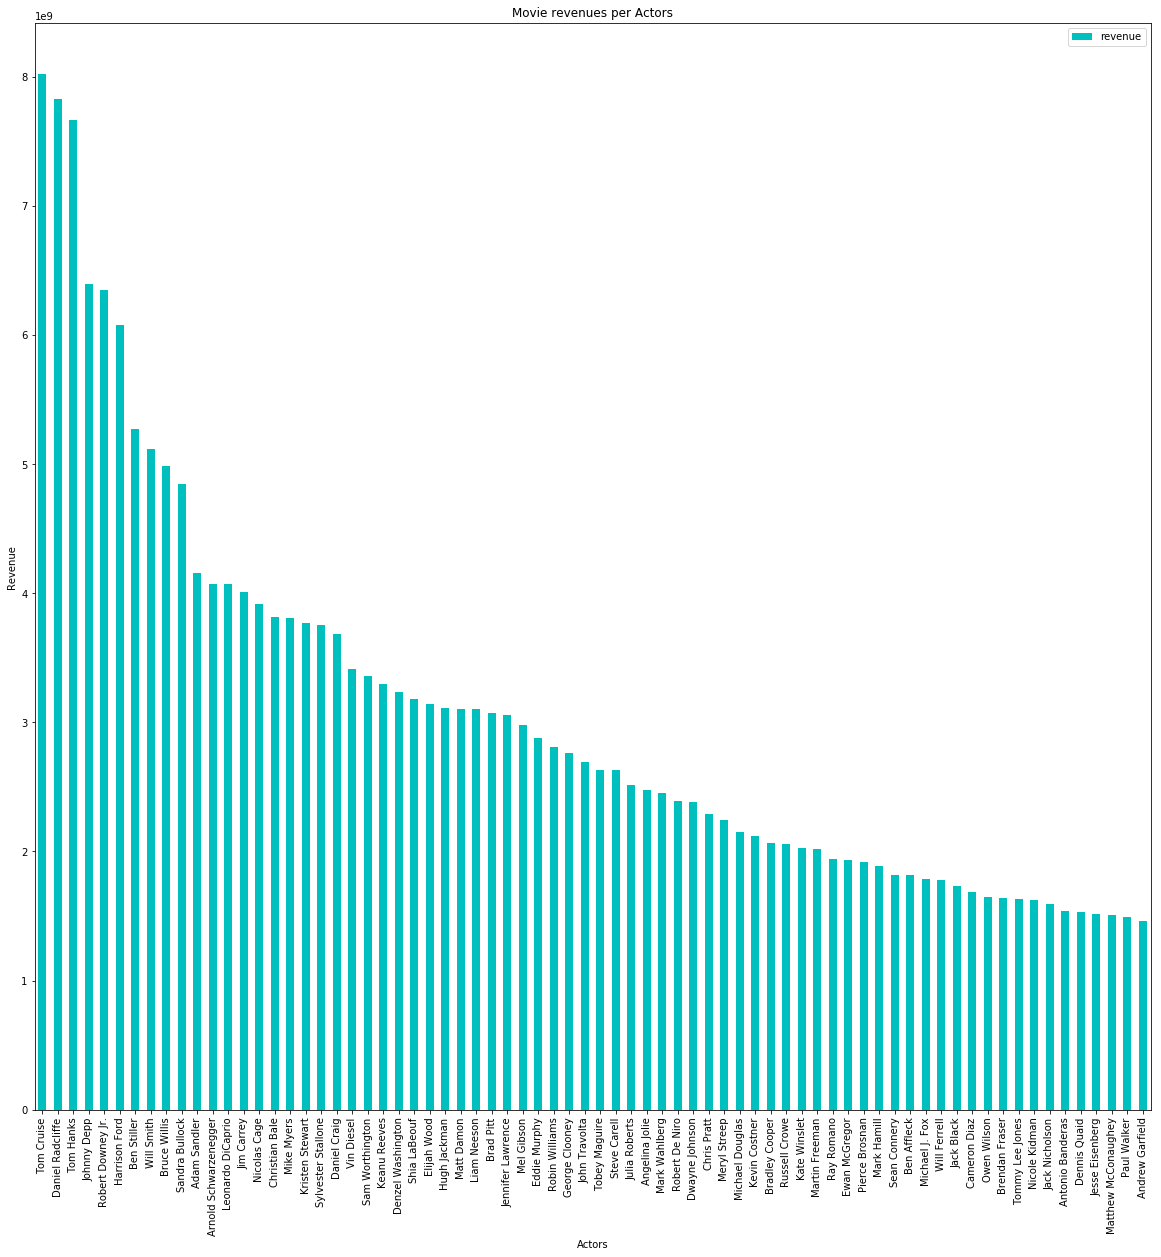

In [18]:
#creating a dataframe of the top 5 percent and plotting it
q=rev_by_actor.revenue.quantile(0.95)
top_5perc=rev_by_actor[rev_by_actor['revenue']>q] 
ax2=top_5perc.sort_values(by='revenue',ascending=False).plot(kind='bar',color='c', figsize=(20,20))
plt.xlabel('Actors')
plt.ylabel('Revenue')
plt.title('Movie revenues per Actors')

## Directors with highly rated movies overall

In [19]:
#creating a dataframe of actors and their average ratings for all their works
avg_rating_by_dir=pd.DataFrame(df_imdb.groupby('director 1')['vote_average'].mean())
avg_rating_by_dir.describe()
#taking the the top 1 percent 
q2=avg_rating_by_dir['vote_average'].quantile(0.99)
dirTop_1per=avg_rating_by_dir[avg_rating_by_dir['vote_average']>q2]
dirTop_1per.head()

,vote_average
director 1,
Ashutosh Gowariker,7.800
Damien Chazelle,8.200
Don Hall,7.800
Jaco Van Dormael,7.800
Josh Boone,7.800


(7.4, 8.6)

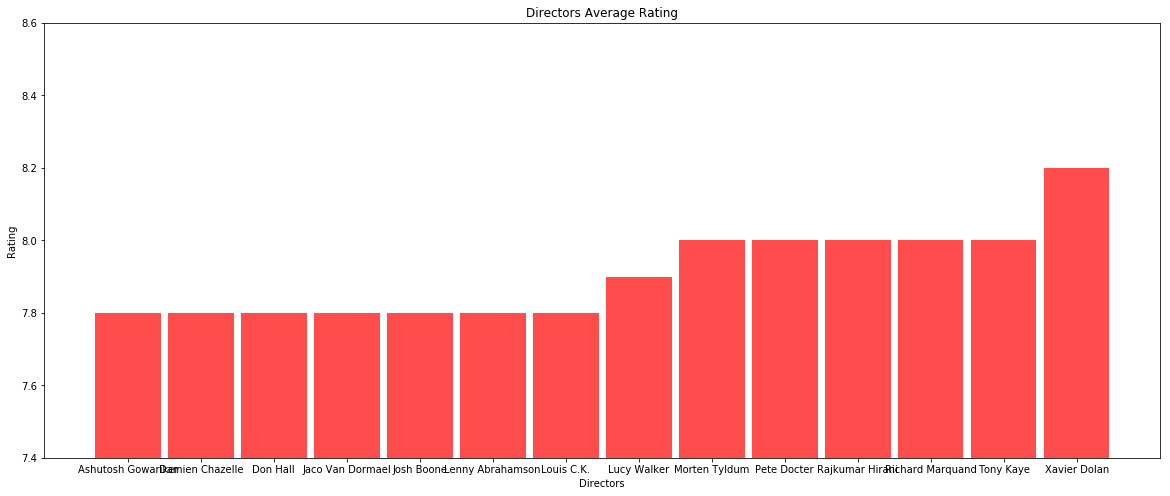

In [20]:
plt.figure(figsize=(20,8))
plt.bar(dirTop_1per.index, dirTop_1per.vote_average.sort_values(),width=0.9,color='r', alpha=0.7)
plt.xlabel('Directors')
plt.ylabel('Rating')
plt.title('Directors Average Rating')
plt.ylim((7.4,8.6))


## most produced movie genres in the last three years

In [21]:
#creating a dataframe counting the frequency of each genre in a year 

df_genre=df_imdb.groupby('release_year')['genres_1'].value_counts().unstack()
df_genre.tail(3)

genres_1,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
2013,35.000,7.000,12.000,30.000,4.000,nan,43.000,nan,6.000,1.000,12.000,3.000,1.000,3.000,8.000,nan,13.000,1.000,1.000
2014,25.000,7.000,5.000,26.000,6.000,nan,41.000,4.000,3.000,2.000,13.000,2.000,2.000,5.000,7.000,nan,12.000,4.000,1.000
2015,24.000,11.000,2.000,26.000,11.000,nan,43.000,3.000,4.000,2.000,8.000,nan,4.000,6.000,5.000,nan,9.000,1.000,1.000


In [22]:
df_genre3=df_genre.tail(3)

2013

Text(0.5, 1.0, '2013 genre repartition')

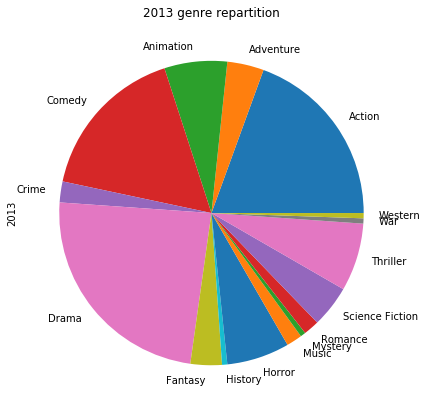

In [23]:
fig1=df_genre3.iloc[0].plot.pie(subplots=True, figsize=(7,7))

plt.title('2013 genre repartition')

2014

Text(0.5, 1.0, '2014 genre repartition')

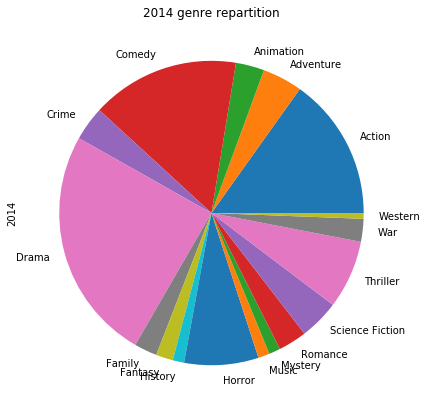

In [24]:
fig2=df_genre3.iloc[1].plot.pie(subplots=True, figsize=(7,7))
plt.title('2014 genre repartition')

2015

Text(0.5, 1.0, '2015 genre repartition')

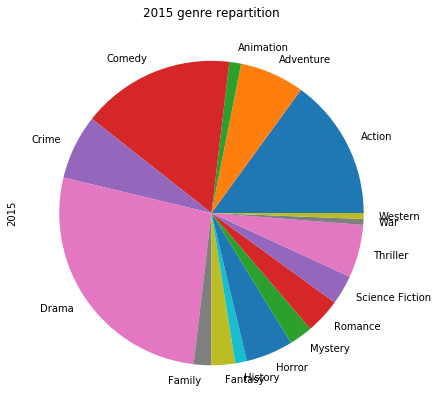

In [25]:
fig3=df_genre3.iloc[2].plot.pie(subplots=True, figsize=(7,7))
plt.title('2015 genre repartition')

<a id='conclusions'></a>

# Conclusions

- How is the the average movie budget increased over the year?
    - Between the mid 80s and mid 90s there was a drastic increase in spendings on movies as we can notice from the line chart of budget evolution over the years.
    
    - The spending on movies reached a steady level and never increased from the late 90s to the present time.
 
    
- Lead Actors that generated most revenue?
    - A brief google research align with the results from the bar chart, most of the actors are either highest grossing actors of all time or starred repeatedly in high grossing movies (Tom Cruise, Tom Hanks, Arnold schwarzenegger... etc)
    - we can notice that the highest grossing actors are the ones who started their acting career in the mid to late 80s which is the time where movie budgets/revenue skyrocketed (with the exception of Daniel Radcliff due to the Harry Potter Franchise massive success)
    
- Directors who produced highly rated movies overall?
    - Directors with highest average rating mostly are directors who produces mostly drama and documentary films as quality products of this genre tend to get higher ratings  
    - Some of critically acclaimed directors are missing from the chart due to high amount of movies that produced in the beginnings of their career which they had very low ratings 

- What was the most produced movie genres for the last three years?
    - the generes Drama, Comedy and Action are clearing dominating the pie chart for the three years making them the most produced movie genre.
    - On the other hand genres Musicals, History, Romance and western had the least share of the number of movies produced 
 
## Limitations:

- The amount of rows that has been removed during the cleaning process exceeds the %5 mark,which most statisticians agrees that it will skew the results of the analysis 

- Documentaries tend to have higher ratings despite their actual popularity and revenue, which affects the correlatoin between revenue and rating

- columns that contained mulitple data: actor, genres and director might not have been ordered in the correct hierarchy, which may lead to losing important information (i.e lead role, main genre ...etc)

<a id='resources'></a>
# Resources 
- https://stackoverflow.com/questions/45205423/find-annual-average-of-pandas-dataframe-with-date-column#comment77377596_45205505

- https://stackoverflow.com/questions/20076195/what-is-the-most-efficient-way-of-counting-occurrences-in-pandas

- https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results

- https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

- pandas and matplotlib documentation